# Interpolation example

### Install instructions

Follow the first steps of OGGM installation (without the oggm part): http://oggm.readthedocs.org/en/latest/installing-oggm.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as shpg
from scipy.interpolate import griddata
import pyproj
import cleo
import salem
%matplotlib inline

In [2]:
# make a salem grid
proj = pyproj.Proj('+proj=merc +lat_0=0. +lon_0=0.')
grid = salem.Grid(nxny=(800, 500), dxdy=(5000, 5000), ll_corner=(-2200000., -100000.), proj=proj)

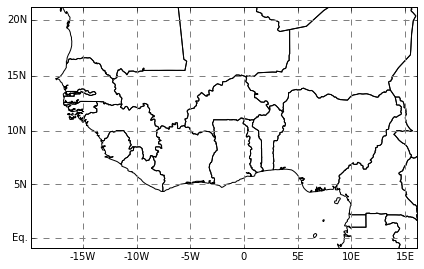

In [3]:
# cleo map
cm = cleo.Map(grid)
cm.visualize()

In [4]:
# Generate random data
ndata = 100
lons = 30 * np.random.random(ndata) - 15
lats = 20 * np.random.random(ndata)
data = lons + 2*lats
points = shpg.MultiPoint([shpg.Point(i, j) for (i, j) in zip(lons, lats)])

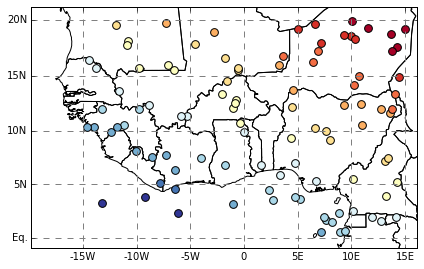

In [5]:
# reset map just in case
cm.set_data()
cm.set_cmap()
cm.set_geometry()
# plot
dl = cleo.DataLevels(data, cmap=plt.cm.RdYlBu_r, nlevels=12)
# This is stupid I should come up with smething better in cleo 
_ = [cm.set_geometry(p, facecolor=c) for (p, c) in zip(points, dl.to_rgb())]
cm.visualize()

In [6]:
# Transform lons, lats to grid
x, y = grid.transform(lons, lats, crs=salem.wgs84)

In [7]:
# Grid x, y
xi, yi = grid.ij_coordinates

In [8]:
# Convert for griddata input 
points = np.array((y, x)).T
inter = np.array((np.ravel(yi), np.ravel(xi))).T

In [9]:
# Interpolate using delaunay triangularization 
out = griddata(points, data, inter, method='linear')
out = out.reshape((grid.ny, grid.nx))

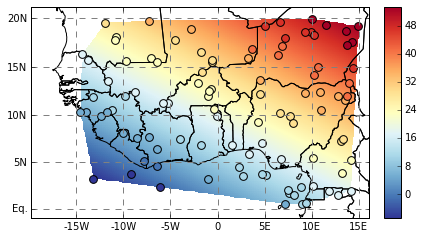

In [12]:
# show the data
cm.set_cmap(plt.cm.RdYlBu_r)
cm.set_nlevels(256)
cm.set_data(out)
cm.visualize()